In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sqlite3

In [4]:
data = pd.read_csv("hello.csv", error_bad_lines=False)

b'Skipping line 303: expected 22 fields, saw 23\n'


In [5]:
data.head(5)
#data.describe()


,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,MA,01450,11/24/1985,31,Female,Married,US Citizen,No,...,2780,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,MA,01460,4/26/1984,32,Male,Divorced,US Citizen,No,...,883,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,MA,02703,9/1/1986,30,Male,Single,US Citizen,No,...,617,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,MA,02170,9/16/1985,31,Female,Married,US Citizen,No,...,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,MA,02330,5/19/1988,28,Female,Single,US Citizen,No,...,403,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [6]:
#data.iloc[0]

# Questions to consider
#Q1.) The Relation between race of a person and his employment status
#Q2.) The Relation between between a person's race and the money he earns
#Q3.) A person's marital status and his employment status
#Q4.) Age group and Employement status
#Q5.) Sex and Employement status, money earned
#Q6.) relation of an employe's performance score with all other paramenter

In [7]:
#1.) using various graphs and pearson's coefficient to arrive at the result

In [8]:
list(data)

['Employee Name',
 'Employee Number',
 'State',
 'Zip',
 'DOB',
 'Age',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'Hispanic/Latino',
 'RaceDesc',
 'Date of Hire',
 'Days Employed',
 'Date of Termination',
 'Reason For Term',
 'Employment Status',
 'Department',
 'Position',
 'Pay Rate',
 'Manager Name',
 'Employee Source',
 'Performance Score']

In [9]:
data_truncated = data[:301]

In [10]:
len(data_truncated)

301

In [11]:
mask1 = data_truncated['Age']
mask2 = data_truncated['Sex']
mask3 = data_truncated['MaritalDesc']
mask4 = data_truncated['RaceDesc']
mask5 = data_truncated['Employment Status']
mask6 = data_truncated['Pay Rate']


In [12]:
#to check if all the data masked have equal lengths
np.unique(mask5.values)
#for i in range(1,7):
 #   print(len(globals()['mask'+str(i)]))
    
    

array(['Active', 'Future Start', 'Leave of Absence',
       'Terminated for Cause', 'Voluntarily Terminated'], dtype=object)

In [53]:
#The relation between the race of a person and his employment status
#different races of people
people_race = np.unique(mask4.values)
mask5_employed = data_truncated['Employment Status'].str.contains('Active')
stage = data_truncated[mask5_employed & mask4]
value = [0]*6
for i in range(0,len(people_race)):
   print(people_race[i],":",len(stage[stage['RaceDesc'] == people_race[i]]))
   value[i] = len(stage[stage['RaceDesc']==people_race[i]])
#values = np.array(value)
len(value)
people_race_index = [1,2,3,4,5,6]


American Indian or Alaska Native : 3
Asian : 15
Black or African American : 33
Hispanic : 2
Two or more races : 9
White : 112


AttributeError: 'numpy.ndarray' object has no attribute 'values'

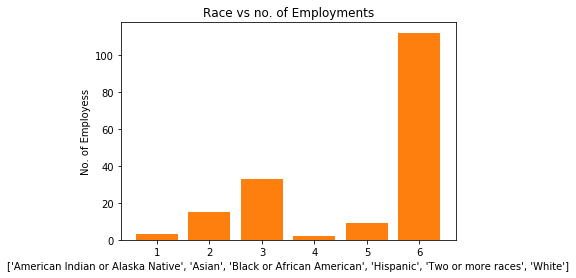

In [59]:
plt.bar(people_race_index,value)
plt.title('Race vs no. of Employments')
plt.xlabel(people_race.tolist())
plt.ylabel("No. of Employess")
plt.show()

In [67]:
stage =  data_truncated[['RaceDesc','Pay Rate','Employment Status']]
stage = stage[stage['Employment Status'] == 'Active']
stage_pay = stage['Pay Rate'].values.tolist()
for i in range(0,len(stage)):
    stage_pay[i] = float(stage_pay[i])
stage_pay = np.array(stage_pay) 
stage['Pay Rate']  = stage_pay
# Pay of active employess converted from Str to float point type

In [79]:
value = [0]*6
for i in np.unique(stage['RaceDesc']):
    print(i," : ",sum(stage['Pay Rate'][stage['RaceDesc'] == i])/len(stage[stage['RaceDesc'] == i]))
value = [31.5,29.36,34.68,58.,35.36,32.36]

American Indian or Alaska Native  :  31.5
Asian  :  29.3606666667
Black or African American  :  34.6881818182
Hispanic  :  58.0
Two or more races  :  35.3622222222
White  :  32.366875


#from the above data it can be computed that at an average a person of two or more races earns the most

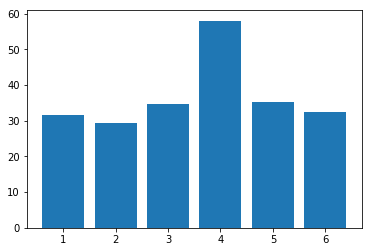

In [88]:

plt.bar(people_race_index,value)
plt.show()

In [86]:
# a person's marital status and his employemnt status
Marital_status = np.unique(mask3.values)

In [57]:
stage = data_truncated[['MaritalDesc','Employment Status']]
stage.head()

,MaritalDesc,Employment Status
0,Married,Active
1,Divorced,Active
2,Single,Active
3,Married,Active
4,Single,Active


In [59]:
for i in Marital_status:
    print(i," : ",len(stage['Employment Status'][stage['MaritalDesc']==i]))

Divorced  :  30
Married  :  119
Separated  :  14
Single  :  127
widowed  :  11


#fromthe above test we infered that Single people have a higher chances of being selected for a job followed By Married people

In [69]:
age_group = np.unique(mask1.values)
age_group

stage = data_truncated[mask5_employed & mask1]
stage = stage[['Employment Status','Age']]
stage.head()

,Employment Status,Age
0,Active,31
1,Active,32
2,Active,30
3,Active,31
4,Active,28


In [71]:
for i in age_group:
    print(i," : ",len(stage['Employment Status'][stage['Age'] == i]))

24  :  2
25  :  2
26  :  4
27  :  9
28  :  12
29  :  8
30  :  10
31  :  10
32  :  8
33  :  11
34  :  6
35  :  8
36  :  5
37  :  12
38  :  7
39  :  7
40  :  4
41  :  4
42  :  6
43  :  5
44  :  1
45  :  1
46  :  5
47  :  4
48  :  5
49  :  3
50  :  3
51  :  3
52  :  1
53  :  3
55  :  1
57  :  1
58  :  0
61  :  0
62  :  2
63  :  0
64  :  0
65  :  1


In [151]:

stage = data_truncated[['Employment Status','Sex','Pay Rate']][data_truncated['Employment Status'] == 'Active']
stage['Pay Rate'] = stage_pay



In [154]:
for i in np.unique(stage['Sex'].values):
    total = len(stage['Employment Status'][stage['Sex'] == i])
    print(i," : ",total," ,average money earned ", sum(stage['Pay Rate'][stage['Sex'] == i])/total)

Female  :  98  ,average money earned  31.6042857143
Male  :  76  ,average money earned  34.7598684211


###### thus it is revealed that in all the Active employess a major portion is that of females but on an average a male employee earns more

In [156]:
#The effects of various factor on pay scale requires concepts of ML to be done after Week 7